In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("Symptom2Disease.csv")

In [37]:
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [38]:
data = data.rename(columns={'label' : 'Disease', 'text' : 'Symptoms', 'Unnamed: 0' : 'Count'})

In [39]:
data

,Count,Disease,Symptoms
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [40]:
# label encoding from scratch our target label 'Disease'

d = {}
for i, disease in enumerate(data['Disease'].unique()):
    d[disease] = i


In [41]:
d

{'Psoriasis': 0,
 'Varicose Veins': 1,
 'Typhoid': 2,
 'Chicken pox': 3,
 'Impetigo': 4,
 'Dengue': 5,
 'Fungal infection': 6,
 'Common Cold': 7,
 'Pneumonia': 8,
 'Dimorphic Hemorrhoids': 9,
 'Arthritis': 10,
 'Acne': 11,
 'Bronchial Asthma': 12,
 'Hypertension': 13,
 'Migraine': 14,
 'Cervical spondylosis': 15,
 'Jaundice': 16,
 'Malaria': 17,
 'urinary tract infection': 18,
 'allergy': 19,
 'gastroesophageal reflux disease': 20,
 'drug reaction': 21,
 'peptic ulcer disease': 22,
 'diabetes': 23}

In [186]:
def encoder(disease):
    return d[disease]
data['Disease_Encoded'] = data['Disease'].map(encoder).astype('object')

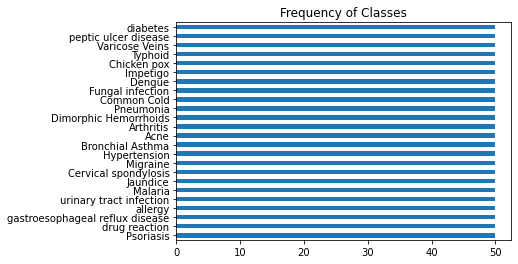

In [274]:
data["Disease"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [43]:
data

,Count,Disease,Symptoms,Disease_Encoded
0,0,Psoriasis,I have been experiencing a skin rash on my arm...,0
1,1,Psoriasis,"My skin has been peeling, especially on my kne...",0
2,2,Psoriasis,I have been experiencing joint pain in my fing...,0
3,3,Psoriasis,"There is a silver like dusting on my skin, esp...",0
4,4,Psoriasis,"My nails have small dents or pits in them, and...",0
...,...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...,23
1196,296,diabetes,"Particularly in the crevices of my skin, I hav...",23
1197,297,diabetes,I regularly experience these intense urges and...,23
1198,298,diabetes,"I have trouble breathing, especially outside. ...",23


In [44]:
# we want to make our symptoms text as simple as possible and remove all unnessecary details
# let's remove all puncuation and make all letters lowercase

data['Symptoms'] = data['Symptoms'].str.replace('[^\w\s]', '')
            

C:\Users\rober\AppData\Local\Temp\ipykernel_1388\754426309.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Symptoms'] = data['Symptoms'].str.replace('[^\w\s]', '')


In [45]:
data['Symptoms'][3]
# punctuation removed with regex 

'There is a silver like dusting on my skin especially on my lower back and scalp This dusting is made up of small scales that flake off easily when I scratch them'

In [46]:
data['Symptoms'] = data['Symptoms'].str.lower()

In [47]:
data['Symptoms'][3]
# lowercase

'there is a silver like dusting on my skin especially on my lower back and scalp this dusting is made up of small scales that flake off easily when i scratch them'

In [48]:
# next thing we can do is remove stop words that do not provide information
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Symptoms'] = data['Symptoms'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
data['Symptoms'][3]
# words like 'there', 'is', and 'a' are removed

'silver like dusting skin especially lower back scalp dusting made small scales flake easily scratch'

In [53]:
# lets tokenize our data so that each word is it's own entry in a list
from nltk.tokenize import word_tokenize
nltk.download('punkt')
data['Symptoms'] = data['Symptoms'].map(lambda x : word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [54]:
data['Symptoms'][3]

['silver',
 'like',
 'dusting',
 'skin',
 'especially',
 'lower',
 'back',
 'scalp',
 'dusting',
 'made',
 'small',
 'scales',
 'flake',
 'easily',
 'scratch']

In [237]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(data['Symptoms'])

def tokenize_and_pad(words, tokenizer, max_len=50):
    # convert the text to sequences of integers
    sequences = tokenizer.texts_to_sequences(words)
    # pad the sequences using the maxlen to make all sequences the same length
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences

 
 

In [238]:
text_vecorized = tokenize_and_pad(data['Symptoms'], tokenizer)

In [245]:
labels = data['Disease_Encoded'].values

In [249]:
new_labels = labels.reshape(-1, 1)

In [250]:
new_labels.shape

(1200, 1)

In [252]:
from sklearn.model_selection import train_test_split
X = text_vecorized
Y = new_labels
text_train, text_test, label_train, label_test = train_test_split(X, Y, test_size = 0.2)

In [258]:
(type(text_train), text_test.shape, label_train.shape)

(numpy.ndarray, (240, 50), (960, 1))

In [283]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length = 50),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(text_train, label_train, epochs=30, validation_data=(text_test, label_test))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 50, 128)           256000    
                                                                 
 global_average_pooling1d_14  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 24)                792       
                                                                 
Total params: 260,920
Trainable params: 260,920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 1s 10ms/step - loss: 3.1746 - accuracy: 0.0792 - val_loss: 3.

In [264]:
text_train = np.asarray(text_train).astype(np.int64)
label_train = np.asarray(label_train).astype(np.int64)
text_test = np.asarray(text_test).astype(np.int64)
label_test = np.asarray(label_test).astype(np.int64)

In [282]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=50),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='softmax')])
model_conv.summary()

model_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_conv_history = model_conv.fit(text_train, label_train, epochs = 30, validation_data = (text_test, label_test))



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 128)           256000    
                                                                 
 dropout_15 (Dropout)        (None, 50, 128)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 128)           82048     
                                                                 
 global_average_pooling1d_13  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                     

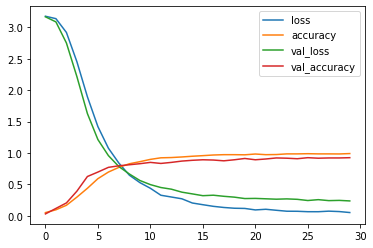

In [279]:
pd.DataFrame(model_conv_history.history).plot();

In [288]:
#tf.random.set_seed(42)
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=50),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(24, activation='softmax')])
model_lstm.summary()

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_lstm_history = model_lstm.fit(text_train, label_train, epochs=30, validation_data=(text_test, label_test))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 128)           256000    
                                                                 
 dropout_25 (Dropout)        (None, 50, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 32)                4128      
                                                                 
 dense_37 (Dense)            (None, 24)                792       
                                                     

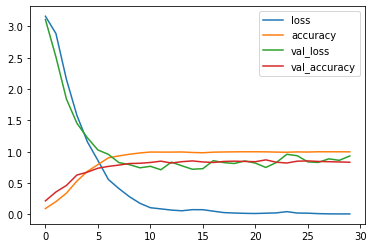

In [289]:
pd.DataFrame(model_lstm_history.history).plot();